# P5 : Capstone Project

For the capstone project, we will be building a model that can successfully differentiate the images of dogs and cats.
The dataset for this project is available on Kaggle and can be downloaded form [here](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data). The whole project is based on deep learning.Also, the dataset is too large to be trained on a CPU efficiently, so we will be training only a small portion of the full daraset(approx~8% of the full dataset). The software requirements for this projects is given in the readme file.

In [1]:
# Import the required packages
import os
import numpy as np
import h5py
import cv2
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D, ZeroPadding2D, Dropout
from keras.callbacks import EarlyStopping, Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
from keras.utils import np_utils
%matplotlib inline

Using Theano backend.


Couldn't import dot_parser, loading of dot files will not be possible.


Each image has some dimesions such as height,width,etc. The images in the dataset we are using consist of three properties namely, height of the image, width of the image, and the number of channels(RGB). There may be some other properties too but this is all we need. Next we specify the path for our files and dimesions for our images. Also, because the dataset is huge so we have split our dataset into train and validation stes. The validation folder contains 20% images corresponding to the total images of that category. Therefore, we have 2000 samples in the training dataset and 800 samples in the validation set. So we got a structure for like this:
```
data/
    train/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
    validation/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
```

In [2]:
# Provide the input directiories where your dataset is stored
train_dir = './train/'
validation_dir = './validation/'

# Defining the dimensions for our image
img_rows = 150
img_columns = 150
channels = 3

# No. of samples in training and validation directory
nb_training_samples = 2000
nb_validation_samples = 800

# Data Exploration

Let's see some samples of our images how do they look like in our dataset. The dataset contains images of only cats and dogs, so we can take samples from train or validation folder.

===========================CATS========================================


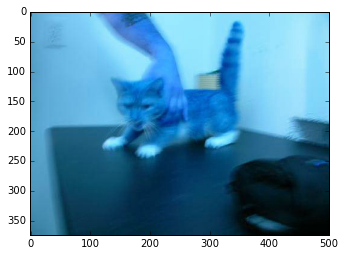

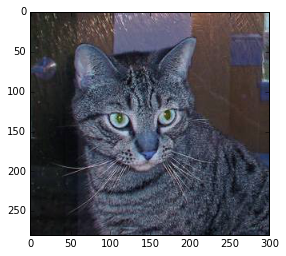

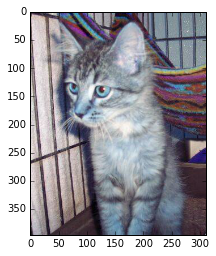

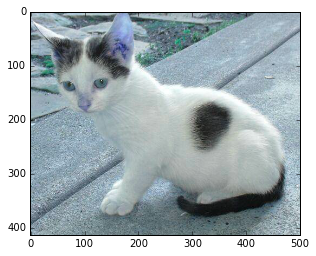

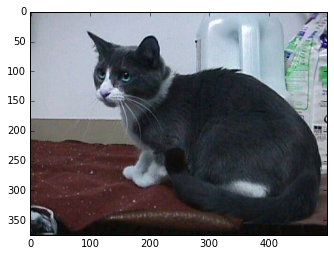

==========================DOGS=======================================================


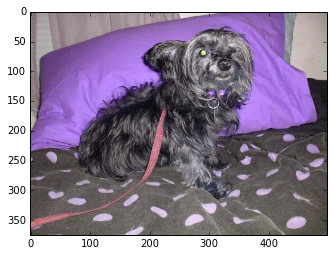

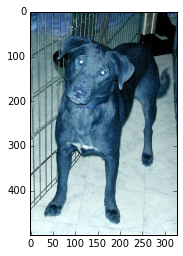

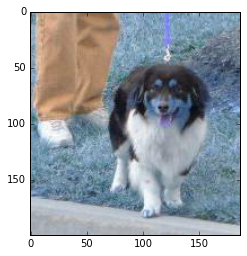

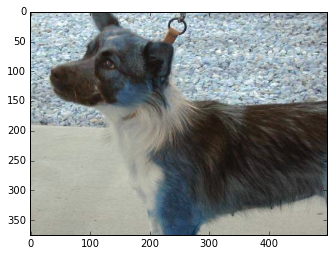

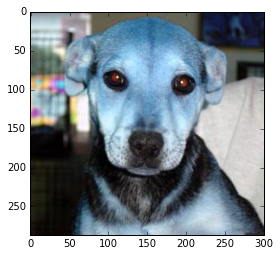

In [4]:
import matplotlib.pyplot as plt

##Plot the images of some cats
print('===========================CATS========================================')
for i in range(5):
    img = cv2.imread('.\\train\\cats\\cat.'+ str(i) +'.jpg') #You need to escape backslashes, 
    cv2.resize(img,(img_rows, img_columns))                  #or your string will be ill-formed in windows.
    plt.imshow(img)
    plt.show()
    
# Plot the images of some dogs
print('==========================DOGS=======================================================')
for i in range(5):
    img = cv2.imread('.\\train\\dogs\\dog.'+ str(i) +'.jpg')
    cv2.resize(img,(img_rows, img_columns))
    plt.imshow(img)
    plt.show()    

Convolution Networks are awesome when it comes to image classification probelms. Though it is easy to build a convolution neural network but there are two concerns related to it. 
* First, if we present a very samll data to our convolution neural network, then we probably will end up with 'Overfitting'. The problem of overfiiting can be tackled by figuring out the amount of information we need to store in the model. If we allow the model to store a large number of features then, it is very likely that our model will be storing large number of irrelevant features. On the other hand if we store a very few features, then our model might miss to store some important features.

* Second, CNN can take large amount of memory and run time in order to solve a probelm. If we want to make our CNN learn on this amount of dataset, it will take hours on a CPU. GPU can speed up the operations but not of all us have the access to it. Though it is desirable to run deep learning models on a GPU, we will try to make our model in such a way that it can be made to run on CPU and that too efficiently.

## A rough model first :
Let us try to build a CNN and run it on a small dataset with a few epochs in order to check how much time each epoch takes on a CPU and how does the model performs after a number of epochs. In keras, a model is an instance if Sequential model. A sequential model is nothing but just a stack of layers where each layer may be of differet type.

In [6]:
datagen = ImageDataGenerator(rescale =1./255)     ## Rescaling is done so that values of pixels lies in range[0,1]
model = Sequential()                              ## Instance of Sequnetial model class

## Add a convolution layer with 32 filters
model.add(Convolution2D(32,3,3, input_shape=(channels, img_rows, img_columns), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))       #MaxPooling makes the feature space small

## Adding another convolution layer with 32 filters
model.add(Convolution2D(32,3,3 , activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

## Adding a convolution layer with 64 filters
model.add(Convolution2D(64,3,3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))     

model.add(Flatten())                                ## Flattens the input
model.add(Dense(64, activation='relu'))             ## A fully connected layer with 64 nodes
model.add(Dropout(0.5))                             ## Dropout layer is used for regularization
model.add(Dense(1, activation='sigmoid'))

#Now compile the model using compile method of Sequential class with appropriate paramteres
#Binary crossentropy is used when the problem is a binary classification problem
model.compile(loss='binary_crossentropy', optimizer ='rmsprop', metrics =['accuracy'])

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = datagen.flow_from_directory(train_dir, 
                                       target_size=(img_rows, img_columns),
                                       batch_size = 32,
                                       class_mode = 'binary')

valid_generator = datagen.flow_from_directory(validation_dir,
                                             target_size=(img_rows, img_columns),
                                             batch_size = 32,
                                             class_mode = 'binary')

##fit the model and check how much time it takes
model.fit_generator(train_generator,
                   samples_per_epoch = nb_training_samples,
                   nb_epoch = 10,
                   validation_data = valid_generator,
                   nb_val_samples = nb_validation_samples)

Found 2000 images belonging to 2 classes.
Found 802 images belonging to 2 classes.
Epoch 1/10
2000/2000 [==============================] - 128s - loss: 0.6938 - acc: 0.5485 - val_loss: 0.8651 - val_acc: 0.5012
Epoch 2/10
2000/2000 [==============================] - 117s - loss: 0.6522 - acc: 0.6315 - val_loss: 0.6349 - val_acc: 0.6334
Epoch 3/10
2000/2000 [==============================] - 115s - loss: 0.5848 - acc: 0.6950 - val_loss: 0.6049 - val_acc: 0.6833
Epoch 4/10
2000/2000 [==============================] - 118s - loss: 0.5540 - acc: 0.7285 - val_loss: 0.5888 - val_acc: 0.6596
Epoch 5/10
2000/2000 [==============================] - 117s - loss: 0.5025 - acc: 0.7530 - val_loss: 0.9872 - val_acc: 0.5798
Epoch 6/10
2000/2000 [==============================] - 115s - loss: 0.4489 - acc: 0.7985 - val_loss: 0.5831 - val_acc: 0.7007
Epoch 7/10
2000/2000 [==============================] - 115s - loss: 0.4140 - acc: 0.8155 - val_loss: 0.5493 - val_acc: 0.7132
Epoch 8/10
2000/2000 [======

In [7]:
##save the weights learned by your model for future use
model.save_weights('initial_model.h5')

As it can be seen that the model did a great job. In only 10 epochs, we got an accuracy of approximately ~70%. This shows that this model would have achieved a great accuracy score if it was allowed to run for a larger number of epochs along with some fine tuning of the parameters but the problem is that the model learns the weights at a very slow rate, when made to run on a CPU. Each epoch takes on an average 115s. Also, the accuracy is good but it is not that good too. It will hardly reach 90%.  

In order to tackle the above two problems we can use the weights of a pre-trained netork that has been trained on a very large dataset of same kind. Thankfully, VGG16 is the architecture that is pre-trained on the ImageNet dataset.
VGG16 model is the 16-layer network used by the VGG team in the ILSVRC-2014 competition.It has been obtained by directly converting the Caffe model provived by the authors.It achieves 7.5% top-5 error on ILSVRC-2012-val, 7.4% top-5 error on ILSVRC-2012-test. The weights for this netwrok have been saved and is available for pubblic use for research purposes. More details about this architecture can be obtained from [here](https://gist.github.com/baraldilorenzo/07d7802847aaad0a35d3).

Now, let's take a look at the VGG16 architecture, what it looks like. 
![alt text](vgg16_original.png "Title")

We can use the architecture as it is for training our model but running VGG16 on a CPU is very computationally expensive. Instead we will use another approach 'storing the features offline'. And by this what we mean is that we will not be using the full archutecture of VGG16 as it is. We will only instantiate the convolutonal part(upto the fully connected layers) of the VGG. Then we will run this model on our  trainig  and validation dataset once and recording the output in two numpy arrays. After that we will train a fully connected layer on the top os these stored features. Let's start building our VGG network now.

# Building the VGG16 model and storing features: 

In [8]:
## Define paths for your weight files
vgg_weights_path = './vgg16_weights.h5'
modified_model_weight_path = './modified_weights.h5'

## Start building the VGG architecture
def build_bottleck_features():
    datagen = ImageDataGenerator(rescale=1./255)
    
    model = Sequential()
    ## Add zero padding layer. Zero padding is done in ordr to control the spatial size of output volumes 
    model.add(ZeroPadding2D((1,1), input_shape=(3, img_rows, img_columns)))
    
    model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_a'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_b'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_a'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_b'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_a'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_b'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_c'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_a'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_b'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_c'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_a'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_b'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_c'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    ## Since there is a complete match between the VGG16 original architecture and the architecture we build,
    ## we can directly load the weights o the VGG16 architecture which are availalbe for public use
    weight_file = h5py.File(vgg_weights_path)
    
    # Get the weights of the VGG upto the fully connected layer
    for i in range(weight_file.attrs['nb_layers']):
        if i >= len(model.layers):
            break
        g = weight_file['layer_{}'.format(i)]
        weights = [g['param_{}'.format(j)] for j in range(g.attrs['nb_params'])]
        model.layers[i].set_weights(weights)
    
    weight_file.close()
    print('VGG model loaded')
    
    
    generator = datagen.flow_from_directory(train_dir,
                                           target_size =(img_rows, img_columns),
                                           batch_size = 50,
                                           class_mode = None, ##generator should yield only batches of data (no labels)
                                           shuffle =False) ## Data will be in order
    
    ##output of the model can be obatined through predict_generator method
    bottleneck_train_features = model.predict_generator(generator, nb_training_samples)
    
    ##save the output as numpy array
    ## use binary mode if you are on windows
    np.save(open('bottleneck_features_train.npy', 'wb'), bottleneck_train_features)
    
    
    generator = datagen.flow_from_directory(validation_dir,
                                           target_size = (img_rows, img_columns),
                                           batch_size = 50,
                                           class_mode = None,
                                           shuffle = False)
    
    bottleneck_validation_features = model.predict_generator(generator, nb_validation_samples)
    np.save(open('bottleneck_features_validation.npy', 'wb'), bottleneck_validation_features)
    
    return model

In [39]:
## load your modified model
def modified_model(early_stopping, saveW=False):
    train_data = np.load(open('bottleneck_features_train.npy','rb'))
    
    ##regenerate the labels
    train_labels = np.array([0] * int(nb_training_samples/2) + [1]* int(nb_training_samples/2))
    
    validation_data = np.load(open('bottleneck_features_validation.npy','rb'))
    validation_labels = np.array([0]* int(nb_validation_samples/2) + [1]* int(nb_validation_samples/2))
    
    model = Sequential()
    model.add(Flatten(input_shape = train_data.shape[1:]))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    ##compile the model
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    ##fit the model
    model.fit(train_data, train_labels,
             nb_epoch = 50,
             batch_size = 32,
             validation_data =(validation_data, validation_labels),
             callbacks = [early_stopping])
    
    ## save the weights for future use
    if saveW:
        model.save_weights(modified_model_weight_path)
    
    return model

In [10]:
model = build_bottleck_features()

VGG model loaded
Found 2000 images belonging to 2 classes.
Found 802 images belonging to 2 classes.


In [46]:
# Define early_stopping in order to tell what to monitor and when to stop. EarlyStopping is a callback in keras
#A callback is a set of functions to be applied at given stages of the training procedure. 
#You can use callbacks to get a view on internal states and statistics of the model during training.
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

In [47]:
modified_model(early_stopping, saveW=False)

Train on 2000 samples, validate on 800 samples
Epoch 1/50
2000/2000 [==============================] - 2s - loss: 0.8311 - acc: 0.7475 - val_loss: 0.6930 - val_acc: 0.6950
Epoch 2/50
2000/2000 [==============================] - 2s - loss: 0.3775 - acc: 0.8345 - val_loss: 0.3317 - val_acc: 0.8625
Epoch 3/50
2000/2000 [==============================] - 2s - loss: 0.3138 - acc: 0.8695 - val_loss: 0.5775 - val_acc: 0.7837
Epoch 4/50
2000/2000 [==============================] - 2s - loss: 0.2566 - acc: 0.8935 - val_loss: 0.4136 - val_acc: 0.8550
Epoch 5/50
2000/2000 [==============================] - 2s - loss: 0.2582 - acc: 0.9010 - val_loss: 0.3260 - val_acc: 0.8850
Epoch 6/50
2000/2000 [==============================] - 3s - loss: 0.2274 - acc: 0.9085 - val_loss: 0.3615 - val_acc: 0.8725
Epoch 7/50
2000/2000 [==============================] - 3s - loss: 0.1791 - acc: 0.9295 - val_loss: 0.4631 - val_acc: 0.8375
Epoch 8/50
2000/2000 [==============================] - 3s - loss: 0.1388 - ac

## Visualization of different metrics: 

As we can see the validation accuracy has improved a lot and it is now above 87%. The training time now has reduced substantially. It is now easy to train this model on a CPU easily as each epoch hardly takes 2s-10s which is quite reasonable for a CNN running on a CPU. Now let's see the variation of validation loss per epoch. This is shown below

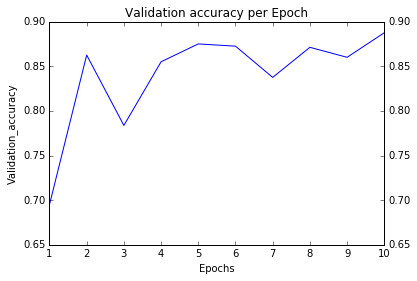

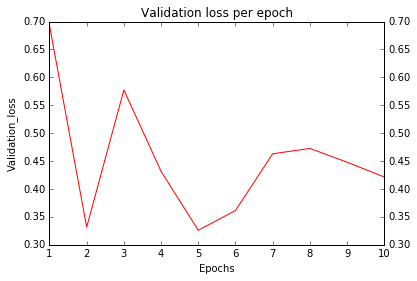

In [52]:
%matplotlib inline
x = [1,2,3,4,5,6,7,8,9,10]
y = [0.6950, 0.8625, 0.7837, 0.8550, 0.8750, 0.8725, 0.8375,0.8712, 0.8600, 0.8875]

plt.plot(x,y)
plt.title('Validation accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Validation_accuracy')
plt.tick_params(labelright = True)
plt.show()

y =[0.6930, 0.3317, 0.5775, 0.4316, 0.3260, 0.3615, 0.4631, 0.4727, 0.4480, 0.4215]
plt.plot(x,y, color ='r')
plt.title('Validation loss per epoch')
plt.xlabel('Epochs')
plt.ylabel('Validation_loss')
plt.tick_params(labelright=True)
plt.show()

### References:  
* https://www.kaggle.com/
* www.google.com
* https://blog.keras.io/
* http://cs231n.github.io/convolutional-networks/
* https://gist.github.com/baraldilorenzo/07d7802847aaad0a35d3
* Wikipedia